# 기본

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=default&so=WAR&ob=DESC&year=2021&sy=&ey=&te=&po=&lt=10100&reg=&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2='

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

team_table = soup.find_all('table')[1]  # 팀 테이블

team_df_pitching_21 = pd.read_html(str(team_table))[0]  # 팀 데이터프레임

print("페이지의 팀 기록 데이터프레임:\n")

team_df_pitching_21

페이지의 팀 기록 데이터프레임:



,Rank,Team,Unnamed: 2_level_0,정렬▼,G,GS,GR,GF,W,L,...,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP,WAR▼
,Rank,Team,Unnamed: 2_level_1,WAR,G,GS,GR,GF,W,L,...,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP,WAR▼
0,1,KT,21,29.04,614,144,470,144,76,59,...,1062,79,1,56,3.69,4.16,4.16,3.66,1.32,29.04
1,2,LG,21,27.40,697,144,553,144,72,58,...,1068,59,5,43,3.59,3.97,3.97,3.88,1.31,27.40
2,3,삼성,21,26.96,675,143,532,144,76,59,...,1038,49,3,58,4.30,4.70,4.70,4.22,1.45,26.96
3,4,두산,21,24.53,658,144,514,144,71,65,...,1045,53,7,52,4.26,4.65,4.65,4.19,1.48,24.53
4,5,NC,21,22.86,696,144,552,144,67,68,...,1055,70,8,75,4.54,4.99,4.99,4.34,1.48,22.86
5,6,SSG,21,18.61,659,143,516,144,66,64,...,1012,69,9,41,4.84,5.22,5.22,4.78,1.51,18.61
6,7,롯데,21,18.31,732,144,588,144,65,71,...,1054,54,5,102,5.38,5.72,5.72,4.64,1.57,18.31
7,8,KIA,21,17.67,676,144,532,144,58,76,...,951,74,9,59,4.91,5.33,5.33,4.81,1.50,17.67
8,9,키움,21,17.36,631,144,487,144,70,67,...,900,95,4,59,4.32,4.99,4.99,4.36,1.46,17.36


In [2]:
# 첫 번째 행을 헤더로 지정하고 데이터프레임을 새로 생성
team_2021_pitching = team_df_pitching_21.copy()
team_2021_pitching.columns = team_2021_pitching.columns.get_level_values(1)

# 첫 번째 행 제거
new_df = team_2021_pitching.drop([0])

team_2021_pitching

,Rank,Team,Unnamed: 2_level_1,WAR,G,GS,GR,GF,W,L,...,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP,WAR▼
0,1,KT,21,29.04,614,144,470,144,76,59,...,1062,79,1,56,3.69,4.16,4.16,3.66,1.32,29.04
1,2,LG,21,27.40,697,144,553,144,72,58,...,1068,59,5,43,3.59,3.97,3.97,3.88,1.31,27.40
2,3,삼성,21,26.96,675,143,532,144,76,59,...,1038,49,3,58,4.30,4.70,4.70,4.22,1.45,26.96
3,4,두산,21,24.53,658,144,514,144,71,65,...,1045,53,7,52,4.26,4.65,4.65,4.19,1.48,24.53
4,5,NC,21,22.86,696,144,552,144,67,68,...,1055,70,8,75,4.54,4.99,4.99,4.34,1.48,22.86
5,6,SSG,21,18.61,659,143,516,144,66,64,...,1012,69,9,41,4.84,5.22,5.22,4.78,1.51,18.61
6,7,롯데,21,18.31,732,144,588,144,65,71,...,1054,54,5,102,5.38,5.72,5.72,4.64,1.57,18.31
7,8,KIA,21,17.67,676,144,532,144,58,76,...,951,74,9,59,4.91,5.33,5.33,4.81,1.50,17.67
8,9,키움,21,17.36,631,144,487,144,70,67,...,900,95,4,59,4.32,4.99,4.99,4.36,1.46,17.36
9,10,한화,21,13.51,717,144,573,144,49,83,...,1011,89,11,56,4.68,5.28,5.28,4.59,1.49,13.51


In [3]:
columns = team_2021_pitching.columns
print(columns)

Index(['Rank', 'Team', 'Unnamed: 2_level_1', 'WAR', 'G', 'GS', 'GR', 'GF', 'W',
       'L', 'S', 'HD', 'IP', 'ER', 'R', 'rRA', 'TBF', 'H', '2B', '3B', 'HR',
       'BB', 'HP', 'IB', 'SO', 'ROE', 'BK', 'WP', 'ERA', 'RA9', 'rRA9', 'FIP',
       'WHIP', 'WAR▼'],
      dtype='object')


In [4]:
team_2021_pitching.drop(columns=['WAR▼'], inplace=True)
team_2021_pitching

,Rank,Team,Unnamed: 2_level_1,WAR,G,GS,GR,GF,W,L,...,IB,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP
0,1,KT,21,29.04,614,144,470,144,76,59,...,18,1062,79,1,56,3.69,4.16,4.16,3.66,1.32
1,2,LG,21,27.40,697,144,553,144,72,58,...,18,1068,59,5,43,3.59,3.97,3.97,3.88,1.31
2,3,삼성,21,26.96,675,143,532,144,76,59,...,13,1038,49,3,58,4.30,4.70,4.70,4.22,1.45
3,4,두산,21,24.53,658,144,514,144,71,65,...,16,1045,53,7,52,4.26,4.65,4.65,4.19,1.48
4,5,NC,21,22.86,696,144,552,144,67,68,...,14,1055,70,8,75,4.54,4.99,4.99,4.34,1.48
5,6,SSG,21,18.61,659,143,516,144,66,64,...,27,1012,69,9,41,4.84,5.22,5.22,4.78,1.51
6,7,롯데,21,18.31,732,144,588,144,65,71,...,19,1054,54,5,102,5.38,5.72,5.72,4.64,1.57
7,8,KIA,21,17.67,676,144,532,144,58,76,...,5,951,74,9,59,4.91,5.33,5.33,4.81,1.50
8,9,키움,21,17.36,631,144,487,144,70,67,...,27,900,95,4,59,4.32,4.99,4.99,4.36,1.46
9,10,한화,21,13.51,717,144,573,144,49,83,...,23,1011,89,11,56,4.68,5.28,5.28,4.59,1.49


In [5]:
pd.set_option('display.max_columns', None)
team_2021_pitching

,Rank,Team,Unnamed: 2_level_1,WAR,G,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP
0,1,KT,21,29.04,614,144,470,144,76,59,33,74,1264.0,518,584,584.0,5397,1176,184,13,86,489,42,18,1062,79,1,56,3.69,4.16,4.16,3.66,1.32
1,2,LG,21,27.40,697,144,553,144,72,58,32,81,1272.1,508,561,561.0,5453,1126,197,18,80,545,98,18,1068,59,5,43,3.59,3.97,3.97,3.88,1.31
2,3,삼성,21,26.96,675,143,532,144,76,59,46,80,1259.0,601,658,658.0,5536,1297,230,24,131,530,51,13,1038,49,3,58,4.30,4.70,4.70,4.22,1.45
3,4,두산,21,24.53,658,144,514,144,71,65,28,61,1269.1,601,656,656.0,5631,1295,212,21,104,587,73,16,1045,53,7,52,4.26,4.65,4.65,4.19,1.48
4,5,NC,21,22.86,696,144,552,144,67,68,33,80,1256.2,634,697,697.0,5622,1268,231,15,125,592,77,14,1055,70,8,75,4.54,4.99,4.99,4.34,1.48
5,6,SSG,21,18.61,659,143,516,144,66,64,25,56,1276.2,686,741,741.0,5706,1296,214,14,149,629,78,27,1012,69,9,41,4.84,5.22,5.22,4.78,1.51
6,7,롯데,21,18.31,732,144,588,144,65,71,37,76,1271.0,760,808,808.0,5759,1333,253,16,133,658,88,19,1054,54,5,102,5.38,5.72,5.72,4.64,1.57
7,8,KIA,21,17.67,676,144,532,144,58,76,36,94,1269.0,693,752,752.0,5701,1286,214,16,134,622,104,5,951,74,9,59,4.91,5.33,5.33,4.81,1.50
8,9,키움,21,17.36,631,144,487,144,70,67,30,56,1263.1,606,700,700.0,5599,1281,223,7,101,566,80,27,900,95,4,59,4.32,4.99,4.99,4.36,1.46
9,10,한화,21,13.51,717,144,573,144,49,83,21,62,1258.2,654,739,739.0,5672,1208,223,19,115,673,101,23,1011,89,11,56,4.68,5.28,5.28,4.59,1.49


# 심화

In [6]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=deepen&so=&ob=&year=2021&sy=2021&ey=2021&te=&po=&lt=10100&reg=&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2='

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

team_table = soup.find_all('table')[1]  # 팀 테이블

team_df_pitching_21_2 = pd.read_html(str(team_table))[0]  # 팀 데이터프레임

print("페이지의 팀 기록 데이터프레임:\n")

team_df_pitching_21_2

페이지의 팀 기록 데이터프레임:



,Rank,Team,Unnamed: 2_level_0,정렬▲,G,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,BABIP,LOB,ERA,RA9,rRA9,FIP▲,xFIP,kwERA,ERA-FIP,ERA-,rRA9-,FIP-,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA
,Rank,Team,Unnamed: 2_level_1,FIP,G,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,BABIP,LOB,ERA,RA9,rRA9,FIP▲,xFIP,kwERA,ERA-FIP,ERA-,rRA9-,FIP-,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA
0,1,KT,21,3.66,614,7.56,3.48,2.17,0.61,19.7,9.1,10.6,0.297,70.8,3.69,4.16,4.16,3.66,2.95,4.13,0.03,78.67,78.66,80.07,0.246,0.319,0.345,0.664,20893,34.0,16.5,3.87
1,2,LG,21,3.88,697,7.56,3.86,1.96,0.57,19.6,10.0,9.6,0.289,72.9,3.59,3.97,3.97,3.88,3.23,4.25,-0.29,84.33,90.11,92.79,0.238,0.327,0.339,0.666,21456,30.8,16.9,3.93
2,3,두산,21,4.19,658,7.41,4.16,1.78,0.74,18.6,10.4,8.1,0.317,71.8,4.26,4.65,4.65,4.19,3.33,4.42,0.07,99.76,104.32,100.11,0.267,0.351,0.384,0.735,22163,33.7,17.5,3.94
3,4,삼성,21,4.22,675,7.42,3.79,1.96,0.94,18.8,9.6,9.2,0.312,72.0,4.30,4.70,4.70,4.22,3.11,4.30,0.08,89.45,85.96,90.46,0.266,0.342,0.404,0.746,21926,32.5,17.4,3.96
4,5,NC,21,4.34,696,7.56,4.24,1.78,0.90,18.8,10.5,8.2,0.306,70.4,4.54,4.99,4.99,4.34,3.29,4.41,0.20,96.14,93.66,94.76,0.260,0.347,0.390,0.737,22346,32.1,17.8,3.97
5,6,키움,21,4.36,631,6.41,4.03,1.59,0.72,16.1,10.1,6.0,0.303,68.7,4.32,4.99,4.99,4.36,3.52,4.68,-0.04,97.18,104.63,100.75,0.264,0.348,0.376,0.724,21670,34.3,17.2,3.87
6,7,한화,21,4.59,717,7.23,4.81,1.50,0.82,17.8,11.9,6.0,0.293,68.3,4.68,5.28,5.28,4.59,3.63,4.68,0.09,104.45,109.98,105.55,0.252,0.352,0.379,0.731,22852,31.9,18.2,4.03
7,8,롯데,21,4.64,732,7.46,4.66,1.60,0.94,18.3,11.4,6.9,0.318,67.1,5.38,5.72,5.72,4.64,3.51,4.57,0.74,111.94,102.71,98.47,0.271,0.364,0.410,0.774,22835,31.2,18.0,3.97
8,9,SSG,21,4.78,659,7.13,4.43,1.61,1.05,17.7,11.0,6.7,0.303,70.3,4.84,5.22,5.22,4.78,3.51,4.59,0.06,103.81,99.28,104.20,0.265,0.354,0.406,0.760,22459,34.1,17.6,3.94


In [7]:
# 첫 번째 행을 헤더로 지정하고 데이터프레임을 새로 생성
team_2021_pitching_2 = team_df_pitching_21_2.copy()
team_2021_pitching_2.columns = team_2021_pitching_2.columns.get_level_values(1)

# 첫 번째 행 제거
new_df = team_2021_pitching_2.drop([0])

team_2021_pitching_2

,Rank,Team,Unnamed: 2_level_1,FIP,G,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,BABIP,LOB,ERA,RA9,rRA9,FIP▲,xFIP,kwERA,ERA-FIP,ERA-,rRA9-,FIP-,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA
0,1,KT,21,3.66,614,7.56,3.48,2.17,0.61,19.7,9.1,10.6,0.297,70.8,3.69,4.16,4.16,3.66,2.95,4.13,0.03,78.67,78.66,80.07,0.246,0.319,0.345,0.664,20893,34.0,16.5,3.87
1,2,LG,21,3.88,697,7.56,3.86,1.96,0.57,19.6,10.0,9.6,0.289,72.9,3.59,3.97,3.97,3.88,3.23,4.25,-0.29,84.33,90.11,92.79,0.238,0.327,0.339,0.666,21456,30.8,16.9,3.93
2,3,두산,21,4.19,658,7.41,4.16,1.78,0.74,18.6,10.4,8.1,0.317,71.8,4.26,4.65,4.65,4.19,3.33,4.42,0.07,99.76,104.32,100.11,0.267,0.351,0.384,0.735,22163,33.7,17.5,3.94
3,4,삼성,21,4.22,675,7.42,3.79,1.96,0.94,18.8,9.6,9.2,0.312,72.0,4.30,4.70,4.70,4.22,3.11,4.30,0.08,89.45,85.96,90.46,0.266,0.342,0.404,0.746,21926,32.5,17.4,3.96
4,5,NC,21,4.34,696,7.56,4.24,1.78,0.90,18.8,10.5,8.2,0.306,70.4,4.54,4.99,4.99,4.34,3.29,4.41,0.20,96.14,93.66,94.76,0.260,0.347,0.390,0.737,22346,32.1,17.8,3.97
5,6,키움,21,4.36,631,6.41,4.03,1.59,0.72,16.1,10.1,6.0,0.303,68.7,4.32,4.99,4.99,4.36,3.52,4.68,-0.04,97.18,104.63,100.75,0.264,0.348,0.376,0.724,21670,34.3,17.2,3.87
6,7,한화,21,4.59,717,7.23,4.81,1.50,0.82,17.8,11.9,6.0,0.293,68.3,4.68,5.28,5.28,4.59,3.63,4.68,0.09,104.45,109.98,105.55,0.252,0.352,0.379,0.731,22852,31.9,18.2,4.03
7,8,롯데,21,4.64,732,7.46,4.66,1.60,0.94,18.3,11.4,6.9,0.318,67.1,5.38,5.72,5.72,4.64,3.51,4.57,0.74,111.94,102.71,98.47,0.271,0.364,0.410,0.774,22835,31.2,18.0,3.97
8,9,SSG,21,4.78,659,7.13,4.43,1.61,1.05,17.7,11.0,6.7,0.303,70.3,4.84,5.22,5.22,4.78,3.51,4.59,0.06,103.81,99.28,104.20,0.265,0.354,0.406,0.760,22459,34.1,17.6,3.94
9,10,KIA,21,4.81,676,6.75,4.41,1.53,0.95,16.7,10.9,5.8,0.301,69.1,4.91,5.33,5.33,4.81,3.68,4.71,0.10,108.29,106.59,108.26,0.265,0.357,0.398,0.755,22375,33.1,17.6,3.92


In [8]:
team_2021_pitching_2.drop(columns=['Rank','Unnamed: 2_level_1'], inplace=True)
team_2021_pitching_2

,Team,FIP,G,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,BABIP,LOB,ERA,RA9,rRA9,FIP▲,xFIP,kwERA,ERA-FIP,ERA-,rRA9-,FIP-,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA
0,KT,3.66,614,7.56,3.48,2.17,0.61,19.7,9.1,10.6,0.297,70.8,3.69,4.16,4.16,3.66,2.95,4.13,0.03,78.67,78.66,80.07,0.246,0.319,0.345,0.664,20893,34.0,16.5,3.87
1,LG,3.88,697,7.56,3.86,1.96,0.57,19.6,10.0,9.6,0.289,72.9,3.59,3.97,3.97,3.88,3.23,4.25,-0.29,84.33,90.11,92.79,0.238,0.327,0.339,0.666,21456,30.8,16.9,3.93
2,두산,4.19,658,7.41,4.16,1.78,0.74,18.6,10.4,8.1,0.317,71.8,4.26,4.65,4.65,4.19,3.33,4.42,0.07,99.76,104.32,100.11,0.267,0.351,0.384,0.735,22163,33.7,17.5,3.94
3,삼성,4.22,675,7.42,3.79,1.96,0.94,18.8,9.6,9.2,0.312,72.0,4.30,4.70,4.70,4.22,3.11,4.30,0.08,89.45,85.96,90.46,0.266,0.342,0.404,0.746,21926,32.5,17.4,3.96
4,NC,4.34,696,7.56,4.24,1.78,0.90,18.8,10.5,8.2,0.306,70.4,4.54,4.99,4.99,4.34,3.29,4.41,0.20,96.14,93.66,94.76,0.260,0.347,0.390,0.737,22346,32.1,17.8,3.97
5,키움,4.36,631,6.41,4.03,1.59,0.72,16.1,10.1,6.0,0.303,68.7,4.32,4.99,4.99,4.36,3.52,4.68,-0.04,97.18,104.63,100.75,0.264,0.348,0.376,0.724,21670,34.3,17.2,3.87
6,한화,4.59,717,7.23,4.81,1.50,0.82,17.8,11.9,6.0,0.293,68.3,4.68,5.28,5.28,4.59,3.63,4.68,0.09,104.45,109.98,105.55,0.252,0.352,0.379,0.731,22852,31.9,18.2,4.03
7,롯데,4.64,732,7.46,4.66,1.60,0.94,18.3,11.4,6.9,0.318,67.1,5.38,5.72,5.72,4.64,3.51,4.57,0.74,111.94,102.71,98.47,0.271,0.364,0.410,0.774,22835,31.2,18.0,3.97
8,SSG,4.78,659,7.13,4.43,1.61,1.05,17.7,11.0,6.7,0.303,70.3,4.84,5.22,5.22,4.78,3.51,4.59,0.06,103.81,99.28,104.20,0.265,0.354,0.406,0.760,22459,34.1,17.6,3.94
9,KIA,4.81,676,6.75,4.41,1.53,0.95,16.7,10.9,5.8,0.301,69.1,4.91,5.33,5.33,4.81,3.68,4.71,0.10,108.29,106.59,108.26,0.265,0.357,0.398,0.755,22375,33.1,17.6,3.92


# 순위

In [9]:
import json
import unicodedata
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
 
def preformat_cjk (string, width, align='<', fill=' '):
    count = (width - sum(1 + (unicodedata.east_asian_width(c) in "WF") for c in string))
    return {
        '>': lambda s: fill * count + s,
        '<': lambda s: s + fill * count,
        '^': lambda s: fill * (count / 2)
                        + s
                        + fill * (count / 2 + count % 2)
    }[align](string)
 
baseballData = urllib.request.urlopen('https://sports.news.naver.com/kbaseball/record/index?category=kbo&year=2021')
source = baseballData.read()
baseballData.close()
 
soup = BeautifulSoup(source,'html.parser')
soup = soup.find_all('script')
 
for script in soup:
    line = str(script)
 
    if 'var ' in line and 'jsonTeamRecord' in line:
        recordList = line.split('jsonTeamRecord = ')
 
        for record in recordList:
            if record.startswith('{'):
                recordLine = record.splitlines()
                for finalLine in recordLine:
                    if finalLine.endswith('}]};'):
                        recordJsonData = finalLine
 
 
r = json.loads(recordJsonData[:-1])
regularTeamRecordList = r['regularTeamRecordList']
 
data = []
for index, team in enumerate(regularTeamRecordList, start=1):
    t = json.loads(str(team).replace("'",'"'))
    tn = preformat_cjk(t['teamName'], 10)
    won = t['won']
    lost = t['lost']
    winDiff = t['winDiff']
    recentResult = t['recentResult']
    data.append([index, tn, won, lost, winDiff, recentResult])
 
df = pd.DataFrame(data, columns=['TeamRanking', 'Team', 'Won', 'Lost', 'WinDiff', 'RecentResult'])
df


,TeamRanking,Team,Won,Lost,WinDiff,RecentResult
0,1,KT,76,59,0.0,3승-6패-1무
1,2,두산,71,65,5.5,5승-3패-2무
2,3,삼성,76,59,0.0,6승-3패-1무
3,4,LG,72,58,1.5,3승-2패-5무
4,5,키움,70,67,7.0,6승-3패-1무
5,6,SSG,66,64,7.5,4승-4패-2무
6,7,NC,67,68,9.0,4승-5패-1무
7,8,롯데,65,71,11.5,4승-4패-2무
8,9,KIA,58,76,17.5,5승-5패-0무
9,10,한화,49,83,25.5,2승-6패-2무


In [10]:
print(team_2021_pitching["Team"])

0     KT
1     LG
2     삼성
3     두산
4     NC
5    SSG
6     롯데
7    KIA
8     키움
9     한화
Name: Team, dtype: object


In [11]:
# team_2021_pitching 데이터프레임의 'team' 열의 공백 제거
team_2021_pitching['Team'] = team_2021_pitching['Team'].str.strip()

# 결과 출력
print(team_2021_pitching['Team'])

0     KT
1     LG
2     삼성
3     두산
4     NC
5    SSG
6     롯데
7    KIA
8     키움
9     한화
Name: Team, dtype: object


In [12]:
# team_2021_pitching 데이터프레임의 'team' 열의 공백 제거
df['Team'] = df['Team'].str.strip()

# 결과 출력
print(df['Team'])

0     KT
1     두산
2     삼성
3     LG
4     키움
5    SSG
6     NC
7     롯데
8    KIA
9     한화
Name: Team, dtype: object


# 병합

In [13]:
# df를 기준으로 team_2021_pitching을 left join하여 병합
team_2021_pitching = pd.merge(df, team_2021_pitching, on='Team', how='left')

# 결과 출력
team_2021_pitching

,TeamRanking,Team,Won,Lost,WinDiff,RecentResult,Rank,Unnamed: 2_level_1,WAR,G,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP
0,1,KT,76,59,0.0,3승-6패-1무,1,21,29.04,614,144,470,144,76,59,33,74,1264.0,518,584,584.0,5397,1176,184,13,86,489,42,18,1062,79,1,56,3.69,4.16,4.16,3.66,1.32
1,2,두산,71,65,5.5,5승-3패-2무,4,21,24.53,658,144,514,144,71,65,28,61,1269.1,601,656,656.0,5631,1295,212,21,104,587,73,16,1045,53,7,52,4.26,4.65,4.65,4.19,1.48
2,3,삼성,76,59,0.0,6승-3패-1무,3,21,26.96,675,143,532,144,76,59,46,80,1259.0,601,658,658.0,5536,1297,230,24,131,530,51,13,1038,49,3,58,4.30,4.70,4.70,4.22,1.45
3,4,LG,72,58,1.5,3승-2패-5무,2,21,27.40,697,144,553,144,72,58,32,81,1272.1,508,561,561.0,5453,1126,197,18,80,545,98,18,1068,59,5,43,3.59,3.97,3.97,3.88,1.31
4,5,키움,70,67,7.0,6승-3패-1무,9,21,17.36,631,144,487,144,70,67,30,56,1263.1,606,700,700.0,5599,1281,223,7,101,566,80,27,900,95,4,59,4.32,4.99,4.99,4.36,1.46
5,6,SSG,66,64,7.5,4승-4패-2무,6,21,18.61,659,143,516,144,66,64,25,56,1276.2,686,741,741.0,5706,1296,214,14,149,629,78,27,1012,69,9,41,4.84,5.22,5.22,4.78,1.51
6,7,NC,67,68,9.0,4승-5패-1무,5,21,22.86,696,144,552,144,67,68,33,80,1256.2,634,697,697.0,5622,1268,231,15,125,592,77,14,1055,70,8,75,4.54,4.99,4.99,4.34,1.48
7,8,롯데,65,71,11.5,4승-4패-2무,7,21,18.31,732,144,588,144,65,71,37,76,1271.0,760,808,808.0,5759,1333,253,16,133,658,88,19,1054,54,5,102,5.38,5.72,5.72,4.64,1.57
8,9,KIA,58,76,17.5,5승-5패-0무,8,21,17.67,676,144,532,144,58,76,36,94,1269.0,693,752,752.0,5701,1286,214,16,134,622,104,5,951,74,9,59,4.91,5.33,5.33,4.81,1.50
9,10,한화,49,83,25.5,2승-6패-2무,10,21,13.51,717,144,573,144,49,83,21,62,1258.2,654,739,739.0,5672,1208,223,19,115,673,101,23,1011,89,11,56,4.68,5.28,5.28,4.59,1.49


In [14]:
team_2021_pitching = team_2021_pitching.drop(columns=['Rank'])

# 결과 출력
team_2021_pitching

,TeamRanking,Team,Won,Lost,WinDiff,RecentResult,Unnamed: 2_level_1,WAR,G,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP
0,1,KT,76,59,0.0,3승-6패-1무,21,29.04,614,144,470,144,76,59,33,74,1264.0,518,584,584.0,5397,1176,184,13,86,489,42,18,1062,79,1,56,3.69,4.16,4.16,3.66,1.32
1,2,두산,71,65,5.5,5승-3패-2무,21,24.53,658,144,514,144,71,65,28,61,1269.1,601,656,656.0,5631,1295,212,21,104,587,73,16,1045,53,7,52,4.26,4.65,4.65,4.19,1.48
2,3,삼성,76,59,0.0,6승-3패-1무,21,26.96,675,143,532,144,76,59,46,80,1259.0,601,658,658.0,5536,1297,230,24,131,530,51,13,1038,49,3,58,4.30,4.70,4.70,4.22,1.45
3,4,LG,72,58,1.5,3승-2패-5무,21,27.40,697,144,553,144,72,58,32,81,1272.1,508,561,561.0,5453,1126,197,18,80,545,98,18,1068,59,5,43,3.59,3.97,3.97,3.88,1.31
4,5,키움,70,67,7.0,6승-3패-1무,21,17.36,631,144,487,144,70,67,30,56,1263.1,606,700,700.0,5599,1281,223,7,101,566,80,27,900,95,4,59,4.32,4.99,4.99,4.36,1.46
5,6,SSG,66,64,7.5,4승-4패-2무,21,18.61,659,143,516,144,66,64,25,56,1276.2,686,741,741.0,5706,1296,214,14,149,629,78,27,1012,69,9,41,4.84,5.22,5.22,4.78,1.51
6,7,NC,67,68,9.0,4승-5패-1무,21,22.86,696,144,552,144,67,68,33,80,1256.2,634,697,697.0,5622,1268,231,15,125,592,77,14,1055,70,8,75,4.54,4.99,4.99,4.34,1.48
7,8,롯데,65,71,11.5,4승-4패-2무,21,18.31,732,144,588,144,65,71,37,76,1271.0,760,808,808.0,5759,1333,253,16,133,658,88,19,1054,54,5,102,5.38,5.72,5.72,4.64,1.57
8,9,KIA,58,76,17.5,5승-5패-0무,21,17.67,676,144,532,144,58,76,36,94,1269.0,693,752,752.0,5701,1286,214,16,134,622,104,5,951,74,9,59,4.91,5.33,5.33,4.81,1.50
9,10,한화,49,83,25.5,2승-6패-2무,21,13.51,717,144,573,144,49,83,21,62,1258.2,654,739,739.0,5672,1208,223,19,115,673,101,23,1011,89,11,56,4.68,5.28,5.28,4.59,1.49


In [15]:
team_2021_pitching.rename(columns={'Unnamed: 2_level_1': 'Season'}, inplace=True)

team_2021_pitching

,TeamRanking,Team,Won,Lost,WinDiff,RecentResult,Season,WAR,G,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP
0,1,KT,76,59,0.0,3승-6패-1무,21,29.04,614,144,470,144,76,59,33,74,1264.0,518,584,584.0,5397,1176,184,13,86,489,42,18,1062,79,1,56,3.69,4.16,4.16,3.66,1.32
1,2,두산,71,65,5.5,5승-3패-2무,21,24.53,658,144,514,144,71,65,28,61,1269.1,601,656,656.0,5631,1295,212,21,104,587,73,16,1045,53,7,52,4.26,4.65,4.65,4.19,1.48
2,3,삼성,76,59,0.0,6승-3패-1무,21,26.96,675,143,532,144,76,59,46,80,1259.0,601,658,658.0,5536,1297,230,24,131,530,51,13,1038,49,3,58,4.30,4.70,4.70,4.22,1.45
3,4,LG,72,58,1.5,3승-2패-5무,21,27.40,697,144,553,144,72,58,32,81,1272.1,508,561,561.0,5453,1126,197,18,80,545,98,18,1068,59,5,43,3.59,3.97,3.97,3.88,1.31
4,5,키움,70,67,7.0,6승-3패-1무,21,17.36,631,144,487,144,70,67,30,56,1263.1,606,700,700.0,5599,1281,223,7,101,566,80,27,900,95,4,59,4.32,4.99,4.99,4.36,1.46
5,6,SSG,66,64,7.5,4승-4패-2무,21,18.61,659,143,516,144,66,64,25,56,1276.2,686,741,741.0,5706,1296,214,14,149,629,78,27,1012,69,9,41,4.84,5.22,5.22,4.78,1.51
6,7,NC,67,68,9.0,4승-5패-1무,21,22.86,696,144,552,144,67,68,33,80,1256.2,634,697,697.0,5622,1268,231,15,125,592,77,14,1055,70,8,75,4.54,4.99,4.99,4.34,1.48
7,8,롯데,65,71,11.5,4승-4패-2무,21,18.31,732,144,588,144,65,71,37,76,1271.0,760,808,808.0,5759,1333,253,16,133,658,88,19,1054,54,5,102,5.38,5.72,5.72,4.64,1.57
8,9,KIA,58,76,17.5,5승-5패-0무,21,17.67,676,144,532,144,58,76,36,94,1269.0,693,752,752.0,5701,1286,214,16,134,622,104,5,951,74,9,59,4.91,5.33,5.33,4.81,1.50
9,10,한화,49,83,25.5,2승-6패-2무,21,13.51,717,144,573,144,49,83,21,62,1258.2,654,739,739.0,5672,1208,223,19,115,673,101,23,1011,89,11,56,4.68,5.28,5.28,4.59,1.49


In [16]:
# df를 기준으로 team_2021_pitching을 left join하여 병합
team_2021_pitching = pd.merge(team_2021_pitching, team_2021_pitching_2, on='Team', how='left')

# 결과 출력
team_2021_pitching

,TeamRanking,Team,Won,Lost,WinDiff,RecentResult,Season,WAR,G_x,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA_x,RA9_x,rRA9_x,FIP_x,WHIP,FIP_y,G_y,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,BABIP,LOB,ERA_y,RA9_y,rRA9_y,FIP▲,xFIP,kwERA,ERA-FIP,ERA-,rRA9-,FIP-,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA
0,1,KT,76,59,0.0,3승-6패-1무,21,29.04,614,144,470,144,76,59,33,74,1264.0,518,584,584.0,5397,1176,184,13,86,489,42,18,1062,79,1,56,3.69,4.16,4.16,3.66,1.32,3.66,614,7.56,3.48,2.17,0.61,19.7,9.1,10.6,0.297,70.8,3.69,4.16,4.16,3.66,2.95,4.13,0.03,78.67,78.66,80.07,0.246,0.319,0.345,0.664,20893,34.0,16.5,3.87
1,2,두산,71,65,5.5,5승-3패-2무,21,24.53,658,144,514,144,71,65,28,61,1269.1,601,656,656.0,5631,1295,212,21,104,587,73,16,1045,53,7,52,4.26,4.65,4.65,4.19,1.48,4.19,658,7.41,4.16,1.78,0.74,18.6,10.4,8.1,0.317,71.8,4.26,4.65,4.65,4.19,3.33,4.42,0.07,99.76,104.32,100.11,0.267,0.351,0.384,0.735,22163,33.7,17.5,3.94
2,3,삼성,76,59,0.0,6승-3패-1무,21,26.96,675,143,532,144,76,59,46,80,1259.0,601,658,658.0,5536,1297,230,24,131,530,51,13,1038,49,3,58,4.30,4.70,4.70,4.22,1.45,4.22,675,7.42,3.79,1.96,0.94,18.8,9.6,9.2,0.312,72.0,4.30,4.70,4.70,4.22,3.11,4.30,0.08,89.45,85.96,90.46,0.266,0.342,0.404,0.746,21926,32.5,17.4,3.96
3,4,LG,72,58,1.5,3승-2패-5무,21,27.40,697,144,553,144,72,58,32,81,1272.1,508,561,561.0,5453,1126,197,18,80,545,98,18,1068,59,5,43,3.59,3.97,3.97,3.88,1.31,3.88,697,7.56,3.86,1.96,0.57,19.6,10.0,9.6,0.289,72.9,3.59,3.97,3.97,3.88,3.23,4.25,-0.29,84.33,90.11,92.79,0.238,0.327,0.339,0.666,21456,30.8,16.9,3.93
4,5,키움,70,67,7.0,6승-3패-1무,21,17.36,631,144,487,144,70,67,30,56,1263.1,606,700,700.0,5599,1281,223,7,101,566,80,27,900,95,4,59,4.32,4.99,4.99,4.36,1.46,4.36,631,6.41,4.03,1.59,0.72,16.1,10.1,6.0,0.303,68.7,4.32,4.99,4.99,4.36,3.52,4.68,-0.04,97.18,104.63,100.75,0.264,0.348,0.376,0.724,21670,34.3,17.2,3.87
5,6,SSG,66,64,7.5,4승-4패-2무,21,18.61,659,143,516,144,66,64,25,56,1276.2,686,741,741.0,5706,1296,214,14,149,629,78,27,1012,69,9,41,4.84,5.22,5.22,4.78,1.51,4.78,659,7.13,4.43,1.61,1.05,17.7,11.0,6.7,0.303,70.3,4.84,5.22,5.22,4.78,3.51,4.59,0.06,103.81,99.28,104.20,0.265,0.354,0.406,0.760,22459,34.1,17.6,3.94
6,7,NC,67,68,9.0,4승-5패-1무,21,22.86,696,144,552,144,67,68,33,80,1256.2,634,697,697.0,5622,1268,231,15,125,592,77,14,1055,70,8,75,4.54,4.99,4.99,4.34,1.48,4.34,696,7.56,4.24,1.78,0.90,18.8,10.5,8.2,0.306,70.4,4.54,4.99,4.99,4.34,3.29,4.41,0.20,96.14,93.66,94.76,0.260,0.347,0.390,0.737,22346,32.1,17.8,3.97
7,8,롯데,65,71,11.5,4승-4패-2무,21,18.31,732,144,588,144,65,71,37,76,1271.0,760,808,808.0,5759,1333,253,16,133,658,88,19,1054,54,5,102,5.38,5.72,5.72,4.64,1.57,4.64,732,7.46,4.66,1.60,0.94,18.3,11.4,6.9,0.318,67.1,5.38,5.72,5.72,4.64,3.51,4.57,0.74,111.94,102.71,98.47,0.271,0.364,0.410,0.774,22835,31.2,18.0,3.97
8,9,KIA,58,76,17.5,5승-5패-0무,21,17.67,676,144,532,144,58,76,36,94,1269.0,693,752,752.0,5701,1286,214,16,134,622,104,5,951,74,9,59,4.91,5.33,5.33,4.81,1.50,4.81,676,6.75,4.41,1.53,0.95,16.7,10.9,5.8,0.301,69.1,4.91,5.33,5.33,4.81,3.68,4.71,0.10,108.29,106.59,108.26,0.265,0.357,0.398,0.755,22375,33.1,17.6,3.92
9,10,한화,49,83,25.5,2승-6패-2무,21,13.51,717,144,573,144,49,83,21,62,1258.2,654,739,739.0,5672,1208,223,19,115,673,101,23,1011,89,11,56,4.68,5.28,5.28,4.59,1.49,4.59,717,7.23,4.81,1.50,0.82,17.8,11.9,6.0,0.293,68.3,4.68,5.28,5.28,4.59,3.63,4.68,0.09,104.45,109.98,105.55,0.252,0.352,0.379,0.731,22852,31.9,18.2,4.03


In [17]:
team_2021_pitching = team_2021_pitching.drop(columns=['RecentResult'])

# 결과 출력
team_2021_pitching

,TeamRanking,Team,Won,Lost,WinDiff,Season,WAR,G_x,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA_x,RA9_x,rRA9_x,FIP_x,WHIP,FIP_y,G_y,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,BABIP,LOB,ERA_y,RA9_y,rRA9_y,FIP▲,xFIP,kwERA,ERA-FIP,ERA-,rRA9-,FIP-,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA
0,1,KT,76,59,0.0,21,29.04,614,144,470,144,76,59,33,74,1264.0,518,584,584.0,5397,1176,184,13,86,489,42,18,1062,79,1,56,3.69,4.16,4.16,3.66,1.32,3.66,614,7.56,3.48,2.17,0.61,19.7,9.1,10.6,0.297,70.8,3.69,4.16,4.16,3.66,2.95,4.13,0.03,78.67,78.66,80.07,0.246,0.319,0.345,0.664,20893,34.0,16.5,3.87
1,2,두산,71,65,5.5,21,24.53,658,144,514,144,71,65,28,61,1269.1,601,656,656.0,5631,1295,212,21,104,587,73,16,1045,53,7,52,4.26,4.65,4.65,4.19,1.48,4.19,658,7.41,4.16,1.78,0.74,18.6,10.4,8.1,0.317,71.8,4.26,4.65,4.65,4.19,3.33,4.42,0.07,99.76,104.32,100.11,0.267,0.351,0.384,0.735,22163,33.7,17.5,3.94
2,3,삼성,76,59,0.0,21,26.96,675,143,532,144,76,59,46,80,1259.0,601,658,658.0,5536,1297,230,24,131,530,51,13,1038,49,3,58,4.30,4.70,4.70,4.22,1.45,4.22,675,7.42,3.79,1.96,0.94,18.8,9.6,9.2,0.312,72.0,4.30,4.70,4.70,4.22,3.11,4.30,0.08,89.45,85.96,90.46,0.266,0.342,0.404,0.746,21926,32.5,17.4,3.96
3,4,LG,72,58,1.5,21,27.40,697,144,553,144,72,58,32,81,1272.1,508,561,561.0,5453,1126,197,18,80,545,98,18,1068,59,5,43,3.59,3.97,3.97,3.88,1.31,3.88,697,7.56,3.86,1.96,0.57,19.6,10.0,9.6,0.289,72.9,3.59,3.97,3.97,3.88,3.23,4.25,-0.29,84.33,90.11,92.79,0.238,0.327,0.339,0.666,21456,30.8,16.9,3.93
4,5,키움,70,67,7.0,21,17.36,631,144,487,144,70,67,30,56,1263.1,606,700,700.0,5599,1281,223,7,101,566,80,27,900,95,4,59,4.32,4.99,4.99,4.36,1.46,4.36,631,6.41,4.03,1.59,0.72,16.1,10.1,6.0,0.303,68.7,4.32,4.99,4.99,4.36,3.52,4.68,-0.04,97.18,104.63,100.75,0.264,0.348,0.376,0.724,21670,34.3,17.2,3.87
5,6,SSG,66,64,7.5,21,18.61,659,143,516,144,66,64,25,56,1276.2,686,741,741.0,5706,1296,214,14,149,629,78,27,1012,69,9,41,4.84,5.22,5.22,4.78,1.51,4.78,659,7.13,4.43,1.61,1.05,17.7,11.0,6.7,0.303,70.3,4.84,5.22,5.22,4.78,3.51,4.59,0.06,103.81,99.28,104.20,0.265,0.354,0.406,0.760,22459,34.1,17.6,3.94
6,7,NC,67,68,9.0,21,22.86,696,144,552,144,67,68,33,80,1256.2,634,697,697.0,5622,1268,231,15,125,592,77,14,1055,70,8,75,4.54,4.99,4.99,4.34,1.48,4.34,696,7.56,4.24,1.78,0.90,18.8,10.5,8.2,0.306,70.4,4.54,4.99,4.99,4.34,3.29,4.41,0.20,96.14,93.66,94.76,0.260,0.347,0.390,0.737,22346,32.1,17.8,3.97
7,8,롯데,65,71,11.5,21,18.31,732,144,588,144,65,71,37,76,1271.0,760,808,808.0,5759,1333,253,16,133,658,88,19,1054,54,5,102,5.38,5.72,5.72,4.64,1.57,4.64,732,7.46,4.66,1.60,0.94,18.3,11.4,6.9,0.318,67.1,5.38,5.72,5.72,4.64,3.51,4.57,0.74,111.94,102.71,98.47,0.271,0.364,0.410,0.774,22835,31.2,18.0,3.97
8,9,KIA,58,76,17.5,21,17.67,676,144,532,144,58,76,36,94,1269.0,693,752,752.0,5701,1286,214,16,134,622,104,5,951,74,9,59,4.91,5.33,5.33,4.81,1.50,4.81,676,6.75,4.41,1.53,0.95,16.7,10.9,5.8,0.301,69.1,4.91,5.33,5.33,4.81,3.68,4.71,0.10,108.29,106.59,108.26,0.265,0.357,0.398,0.755,22375,33.1,17.6,3.92
9,10,한화,49,83,25.5,21,13.51,717,144,573,144,49,83,21,62,1258.2,654,739,739.0,5672,1208,223,19,115,673,101,23,1011,89,11,56,4.68,5.28,5.28,4.59,1.49,4.59,717,7.23,4.81,1.50,0.82,17.8,11.9,6.0,0.293,68.3,4.68,5.28,5.28,4.59,3.63,4.68,0.09,104.45,109.98,105.55,0.252,0.352,0.379,0.731,22852,31.9,18.2,4.03


In [18]:
# '_y'를 포함한 열 선택
columns_to_drop = team_2021_pitching.filter(like='_y').columns

# 선택된 열 삭제
team_2021_pitching.drop(columns=columns_to_drop, inplace=True)

team_2021_pitching

,TeamRanking,Team,Won,Lost,WinDiff,Season,WAR,G_x,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA_x,RA9_x,rRA9_x,FIP_x,WHIP,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,BABIP,LOB,FIP▲,xFIP,kwERA,ERA-FIP,ERA-,rRA9-,FIP-,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA
0,1,KT,76,59,0.0,21,29.04,614,144,470,144,76,59,33,74,1264.0,518,584,584.0,5397,1176,184,13,86,489,42,18,1062,79,1,56,3.69,4.16,4.16,3.66,1.32,7.56,3.48,2.17,0.61,19.7,9.1,10.6,0.297,70.8,3.66,2.95,4.13,0.03,78.67,78.66,80.07,0.246,0.319,0.345,0.664,20893,34.0,16.5,3.87
1,2,두산,71,65,5.5,21,24.53,658,144,514,144,71,65,28,61,1269.1,601,656,656.0,5631,1295,212,21,104,587,73,16,1045,53,7,52,4.26,4.65,4.65,4.19,1.48,7.41,4.16,1.78,0.74,18.6,10.4,8.1,0.317,71.8,4.19,3.33,4.42,0.07,99.76,104.32,100.11,0.267,0.351,0.384,0.735,22163,33.7,17.5,3.94
2,3,삼성,76,59,0.0,21,26.96,675,143,532,144,76,59,46,80,1259.0,601,658,658.0,5536,1297,230,24,131,530,51,13,1038,49,3,58,4.30,4.70,4.70,4.22,1.45,7.42,3.79,1.96,0.94,18.8,9.6,9.2,0.312,72.0,4.22,3.11,4.30,0.08,89.45,85.96,90.46,0.266,0.342,0.404,0.746,21926,32.5,17.4,3.96
3,4,LG,72,58,1.5,21,27.40,697,144,553,144,72,58,32,81,1272.1,508,561,561.0,5453,1126,197,18,80,545,98,18,1068,59,5,43,3.59,3.97,3.97,3.88,1.31,7.56,3.86,1.96,0.57,19.6,10.0,9.6,0.289,72.9,3.88,3.23,4.25,-0.29,84.33,90.11,92.79,0.238,0.327,0.339,0.666,21456,30.8,16.9,3.93
4,5,키움,70,67,7.0,21,17.36,631,144,487,144,70,67,30,56,1263.1,606,700,700.0,5599,1281,223,7,101,566,80,27,900,95,4,59,4.32,4.99,4.99,4.36,1.46,6.41,4.03,1.59,0.72,16.1,10.1,6.0,0.303,68.7,4.36,3.52,4.68,-0.04,97.18,104.63,100.75,0.264,0.348,0.376,0.724,21670,34.3,17.2,3.87
5,6,SSG,66,64,7.5,21,18.61,659,143,516,144,66,64,25,56,1276.2,686,741,741.0,5706,1296,214,14,149,629,78,27,1012,69,9,41,4.84,5.22,5.22,4.78,1.51,7.13,4.43,1.61,1.05,17.7,11.0,6.7,0.303,70.3,4.78,3.51,4.59,0.06,103.81,99.28,104.20,0.265,0.354,0.406,0.760,22459,34.1,17.6,3.94
6,7,NC,67,68,9.0,21,22.86,696,144,552,144,67,68,33,80,1256.2,634,697,697.0,5622,1268,231,15,125,592,77,14,1055,70,8,75,4.54,4.99,4.99,4.34,1.48,7.56,4.24,1.78,0.90,18.8,10.5,8.2,0.306,70.4,4.34,3.29,4.41,0.20,96.14,93.66,94.76,0.260,0.347,0.390,0.737,22346,32.1,17.8,3.97
7,8,롯데,65,71,11.5,21,18.31,732,144,588,144,65,71,37,76,1271.0,760,808,808.0,5759,1333,253,16,133,658,88,19,1054,54,5,102,5.38,5.72,5.72,4.64,1.57,7.46,4.66,1.60,0.94,18.3,11.4,6.9,0.318,67.1,4.64,3.51,4.57,0.74,111.94,102.71,98.47,0.271,0.364,0.410,0.774,22835,31.2,18.0,3.97
8,9,KIA,58,76,17.5,21,17.67,676,144,532,144,58,76,36,94,1269.0,693,752,752.0,5701,1286,214,16,134,622,104,5,951,74,9,59,4.91,5.33,5.33,4.81,1.50,6.75,4.41,1.53,0.95,16.7,10.9,5.8,0.301,69.1,4.81,3.68,4.71,0.10,108.29,106.59,108.26,0.265,0.357,0.398,0.755,22375,33.1,17.6,3.92
9,10,한화,49,83,25.5,21,13.51,717,144,573,144,49,83,21,62,1258.2,654,739,739.0,5672,1208,223,19,115,673,101,23,1011,89,11,56,4.68,5.28,5.28,4.59,1.49,7.23,4.81,1.50,0.82,17.8,11.9,6.0,0.293,68.3,4.59,3.63,4.68,0.09,104.45,109.98,105.55,0.252,0.352,0.379,0.731,22852,31.9,18.2,4.03


In [19]:
# 열 이름에서 '_x'를 제거하여 다시 지정
team_2021_pitching.columns = team_2021_pitching.columns.str.replace('_x', '')

# 결과 확인
team_2021_pitching

,TeamRanking,Team,Won,Lost,WinDiff,Season,WAR,G,GS,GR,GF,W,L,S,HD,IP,ER,R,rRA,TBF,H,2B,3B,HR,BB,HP,IB,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,BABIP,LOB,FIP▲,xFIP,kwERA,ERA-FIP,ERA-,rRA9-,FIP-,AVG,OBP,SLG,OPS,NP,P/G,P/IP,P/PA
0,1,KT,76,59,0.0,21,29.04,614,144,470,144,76,59,33,74,1264.0,518,584,584.0,5397,1176,184,13,86,489,42,18,1062,79,1,56,3.69,4.16,4.16,3.66,1.32,7.56,3.48,2.17,0.61,19.7,9.1,10.6,0.297,70.8,3.66,2.95,4.13,0.03,78.67,78.66,80.07,0.246,0.319,0.345,0.664,20893,34.0,16.5,3.87
1,2,두산,71,65,5.5,21,24.53,658,144,514,144,71,65,28,61,1269.1,601,656,656.0,5631,1295,212,21,104,587,73,16,1045,53,7,52,4.26,4.65,4.65,4.19,1.48,7.41,4.16,1.78,0.74,18.6,10.4,8.1,0.317,71.8,4.19,3.33,4.42,0.07,99.76,104.32,100.11,0.267,0.351,0.384,0.735,22163,33.7,17.5,3.94
2,3,삼성,76,59,0.0,21,26.96,675,143,532,144,76,59,46,80,1259.0,601,658,658.0,5536,1297,230,24,131,530,51,13,1038,49,3,58,4.30,4.70,4.70,4.22,1.45,7.42,3.79,1.96,0.94,18.8,9.6,9.2,0.312,72.0,4.22,3.11,4.30,0.08,89.45,85.96,90.46,0.266,0.342,0.404,0.746,21926,32.5,17.4,3.96
3,4,LG,72,58,1.5,21,27.40,697,144,553,144,72,58,32,81,1272.1,508,561,561.0,5453,1126,197,18,80,545,98,18,1068,59,5,43,3.59,3.97,3.97,3.88,1.31,7.56,3.86,1.96,0.57,19.6,10.0,9.6,0.289,72.9,3.88,3.23,4.25,-0.29,84.33,90.11,92.79,0.238,0.327,0.339,0.666,21456,30.8,16.9,3.93
4,5,키움,70,67,7.0,21,17.36,631,144,487,144,70,67,30,56,1263.1,606,700,700.0,5599,1281,223,7,101,566,80,27,900,95,4,59,4.32,4.99,4.99,4.36,1.46,6.41,4.03,1.59,0.72,16.1,10.1,6.0,0.303,68.7,4.36,3.52,4.68,-0.04,97.18,104.63,100.75,0.264,0.348,0.376,0.724,21670,34.3,17.2,3.87
5,6,SSG,66,64,7.5,21,18.61,659,143,516,144,66,64,25,56,1276.2,686,741,741.0,5706,1296,214,14,149,629,78,27,1012,69,9,41,4.84,5.22,5.22,4.78,1.51,7.13,4.43,1.61,1.05,17.7,11.0,6.7,0.303,70.3,4.78,3.51,4.59,0.06,103.81,99.28,104.20,0.265,0.354,0.406,0.760,22459,34.1,17.6,3.94
6,7,NC,67,68,9.0,21,22.86,696,144,552,144,67,68,33,80,1256.2,634,697,697.0,5622,1268,231,15,125,592,77,14,1055,70,8,75,4.54,4.99,4.99,4.34,1.48,7.56,4.24,1.78,0.90,18.8,10.5,8.2,0.306,70.4,4.34,3.29,4.41,0.20,96.14,93.66,94.76,0.260,0.347,0.390,0.737,22346,32.1,17.8,3.97
7,8,롯데,65,71,11.5,21,18.31,732,144,588,144,65,71,37,76,1271.0,760,808,808.0,5759,1333,253,16,133,658,88,19,1054,54,5,102,5.38,5.72,5.72,4.64,1.57,7.46,4.66,1.60,0.94,18.3,11.4,6.9,0.318,67.1,4.64,3.51,4.57,0.74,111.94,102.71,98.47,0.271,0.364,0.410,0.774,22835,31.2,18.0,3.97
8,9,KIA,58,76,17.5,21,17.67,676,144,532,144,58,76,36,94,1269.0,693,752,752.0,5701,1286,214,16,134,622,104,5,951,74,9,59,4.91,5.33,5.33,4.81,1.50,6.75,4.41,1.53,0.95,16.7,10.9,5.8,0.301,69.1,4.81,3.68,4.71,0.10,108.29,106.59,108.26,0.265,0.357,0.398,0.755,22375,33.1,17.6,3.92
9,10,한화,49,83,25.5,21,13.51,717,144,573,144,49,83,21,62,1258.2,654,739,739.0,5672,1208,223,19,115,673,101,23,1011,89,11,56,4.68,5.28,5.28,4.59,1.49,7.23,4.81,1.50,0.82,17.8,11.9,6.0,0.293,68.3,4.59,3.63,4.68,0.09,104.45,109.98,105.55,0.252,0.352,0.379,0.731,22852,31.9,18.2,4.03


# WAR

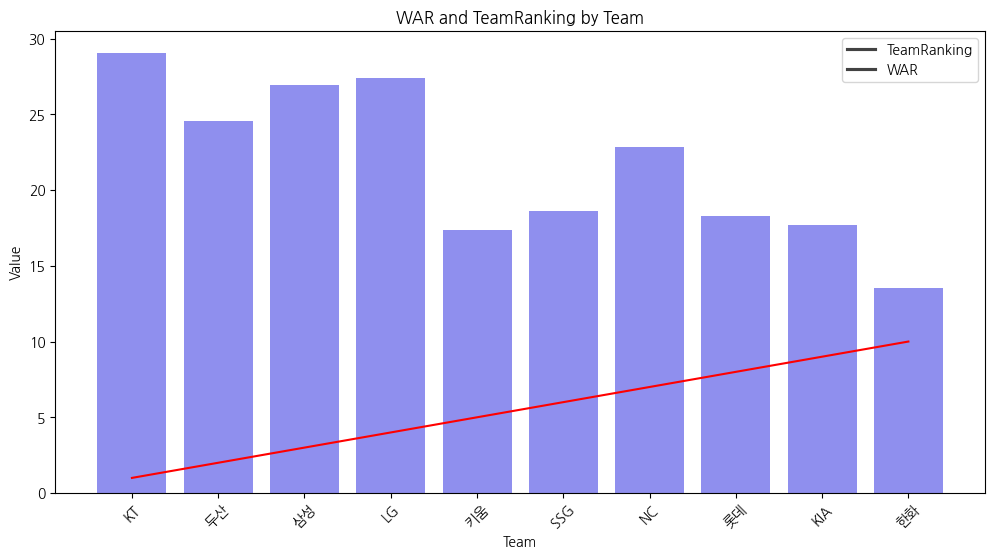

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 팀별 WAR을 막대 그래프로 시각화
sns.barplot(x='Team', y='WAR', data=team_2021_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

# 팀별 TeamRanking을 선 그래프로 시각화
sns.lineplot(x='Team', y='TeamRanking', data=team_2021_pitching, color='r')

# 제목과 축 라벨 설정
plt.title('WAR and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

# x축 레이블 회전
plt.xticks(rotation=45)

# 범례 설정
plt.legend(labels=['TeamRanking', 'WAR'])

# 그래프 출력
plt.show()


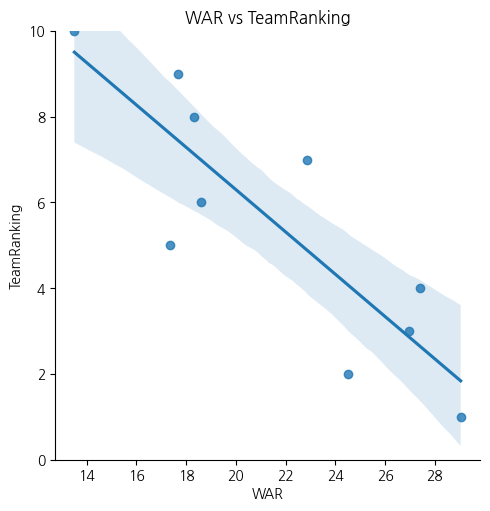

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# WAR와 TeamRanking 간의 산점도와 선형 회귀 선 그리기
sns.lmplot(x='WAR', y='TeamRanking', data=team_2021_pitching)
plt.title('WAR vs TeamRanking')
plt.xlabel('WAR')
plt.ylabel('TeamRanking')
plt.ylim(0, 10)
plt.show()


# ER

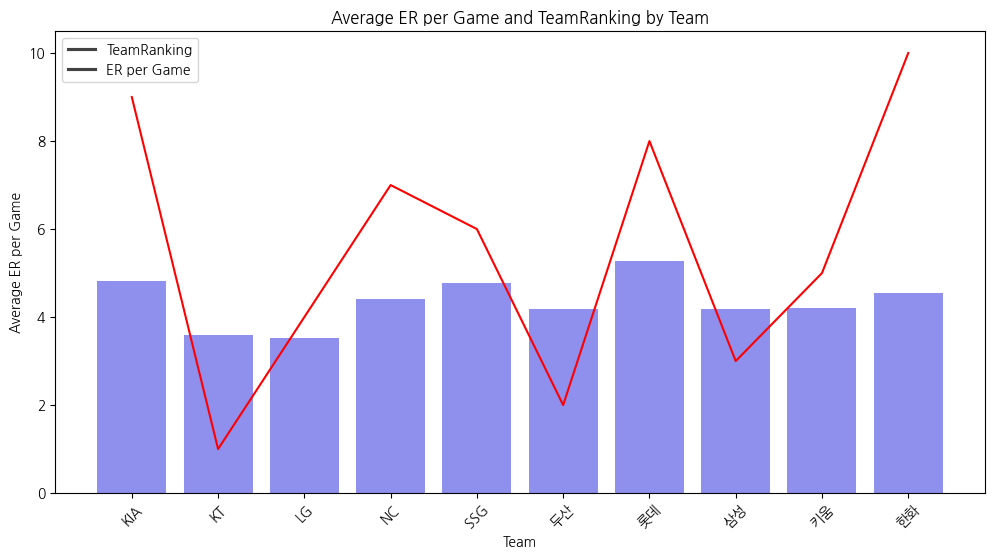

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# ER을 144로 나눈 후 평균 계산
team_2021_pitching['ER_per_game'] = team_2021_pitching['ER'] / 144
average_er_per_game_by_team = team_2021_pitching.groupby('Team')['ER_per_game'].mean().reset_index()

# TeamRanking을 오름차순으로 정렬
team_2021_pitching_sorted = team_2021_pitching.sort_values(by='TeamRanking')

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 팀별 ER을 막대 그래프로 시각화
sns.barplot(x='Team', y='ER_per_game', data=average_er_per_game_by_team, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

# 팀별 TeamRanking을 선 그래프로 시각화
sns.lineplot(x='Team', y='TeamRanking', data=team_2021_pitching_sorted, color='r')

# 제목과 축 라벨 설정
plt.title('Average ER per Game and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Average ER per Game')

# x축 레이블 회전
plt.xticks(rotation=45)

# 범례 설정
plt.legend(labels=['TeamRanking', 'ER per Game'])

# 그래프 출력
plt.show()


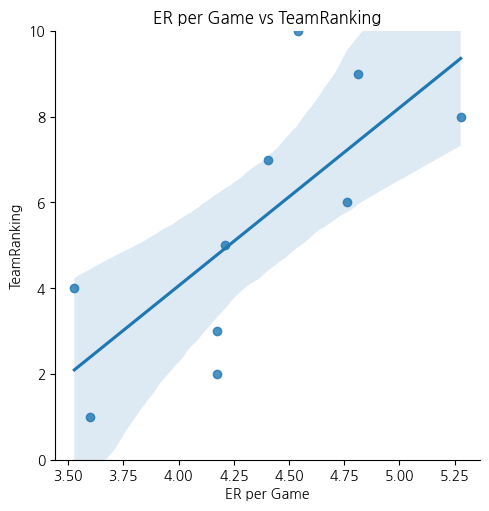

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# ER을 144로 나눈 값을 추가
team_2021_pitching['ER_per_game'] = team_2021_pitching['ER'] / 144

# ER_per_game과 TeamRanking 간의 상관 관계 시각화
sns.lmplot(x='ER_per_game', y='TeamRanking', data=team_2021_pitching)
plt.title('ER per Game vs TeamRanking')
plt.xlabel('ER per Game')
plt.ylabel('TeamRanking')
plt.ylim(0, 10)
plt.show()

# K/9

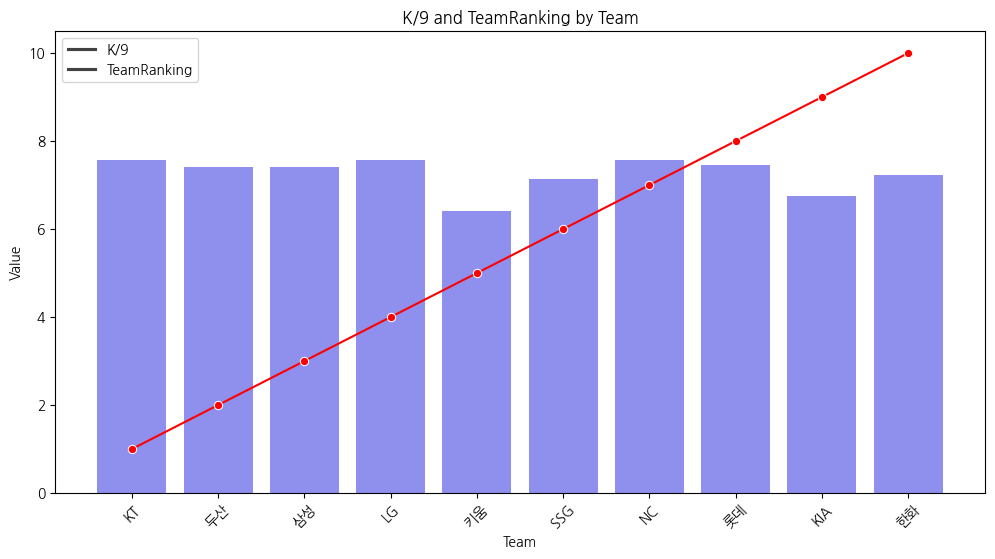

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 팀별 K/9을 막대 그래프로 시각화
sns.barplot(x='Team', y='K/9', data=team_2021_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

# TeamRanking을 선 그래프로 시각화
sns.lineplot(x='Team', y='TeamRanking', data=team_2021_pitching, color='r', marker='o')  # marker는 데이터 포인트를 표시하는 모양을 지정합니다.

# 제목과 축 라벨 설정
plt.title('K/9 and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

# x축 레이블 회전
plt.xticks(rotation=45)

# 범례 설정
plt.legend(labels=['K/9', 'TeamRanking'])

# 그래프 출력
plt.show()

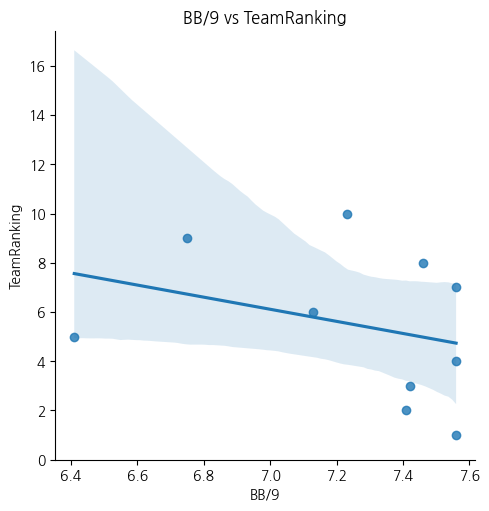

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='K/9', y='TeamRanking', data=team_2021_pitching)
plt.title('BB/9 vs TeamRanking')
plt.xlabel('BB/9')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()


# BB/9

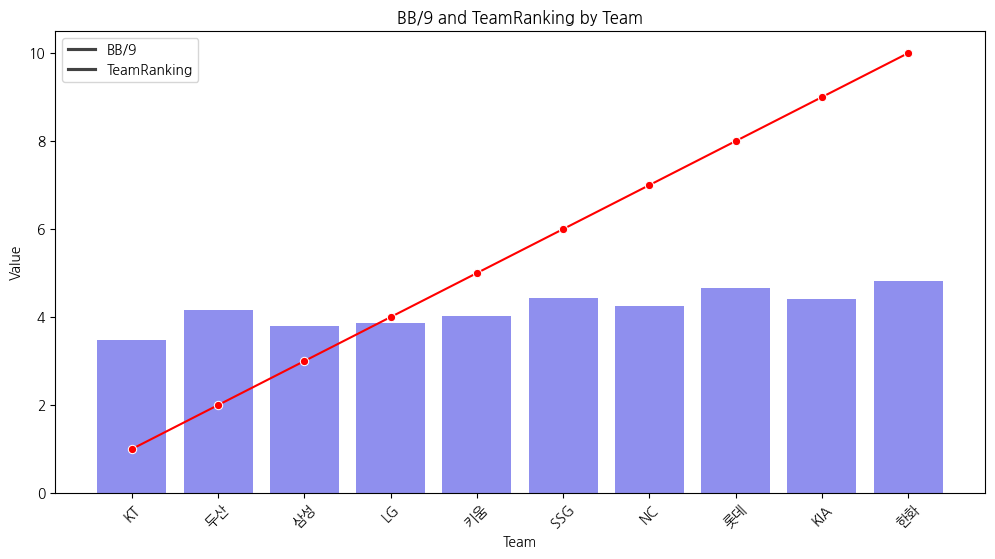

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='BB/9', data=team_2021_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

sns.lineplot(x='Team', y='TeamRanking', data=team_2021_pitching, color='r', marker='o')  # marker는 데이터 포인트를 표시하는 모양을 지정합니다.

plt.title('BB/9 and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['BB/9', 'TeamRanking'])

plt.show()

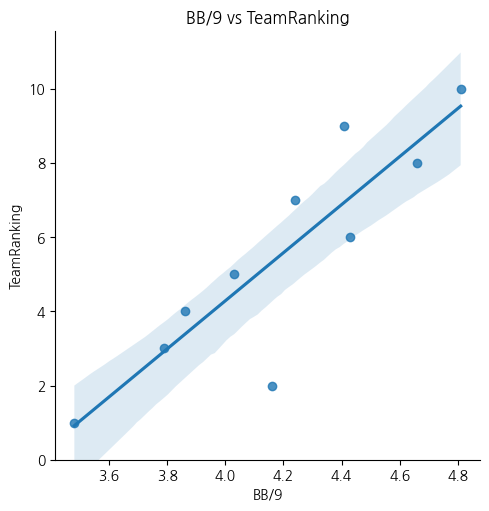

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='BB/9', y='TeamRanking', data=team_2021_pitching)
plt.title('BB/9 vs TeamRanking')
plt.xlabel('BB/9')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()


# K/BB

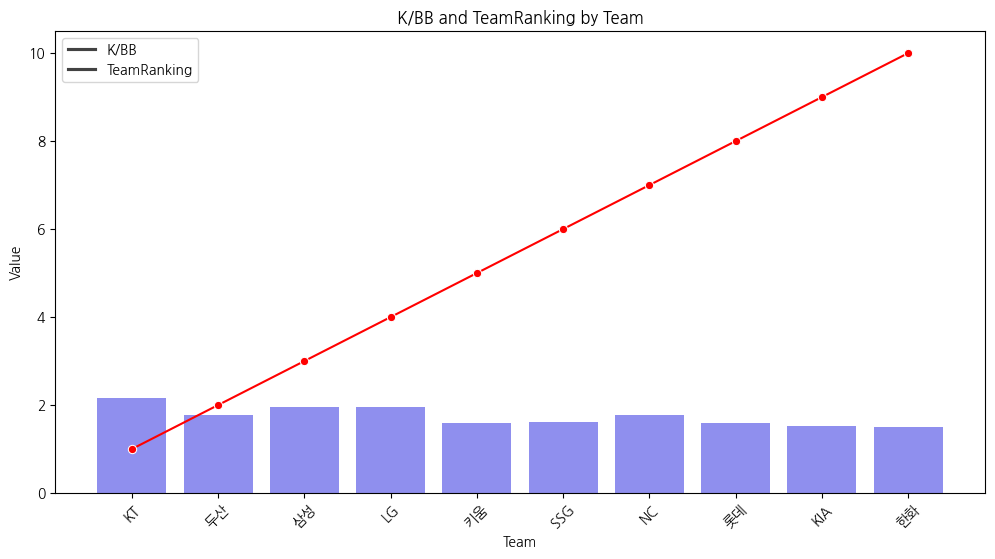

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='K/BB', data=team_2021_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

sns.lineplot(x='Team', y='TeamRanking', data=team_2021_pitching, color='r', marker='o')  # marker는 데이터 포인트를 표시하는 모양을 지정합니다.

plt.title('K/BB and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['K/BB', 'TeamRanking'])

plt.show()

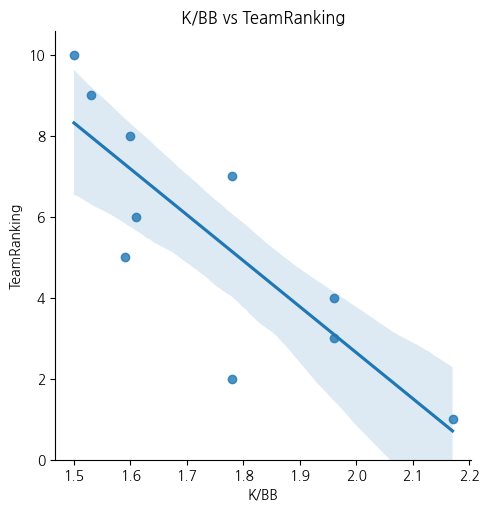

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='K/BB', y='TeamRanking', data=team_2021_pitching)
plt.title('K/BB vs TeamRanking')
plt.xlabel('K/BB')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()


# BABIP

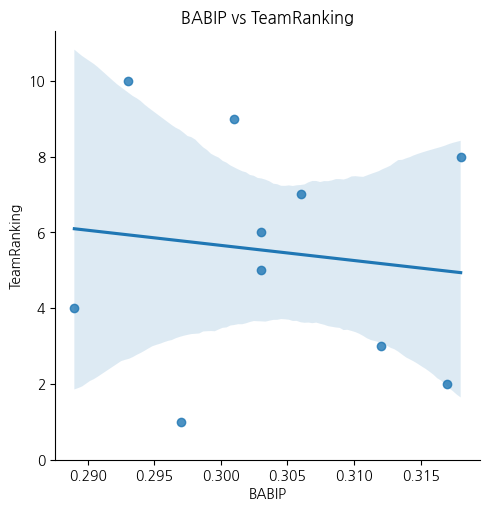

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='BABIP', y='TeamRanking', data=team_2021_pitching)
plt.title('BABIP vs TeamRanking')
plt.xlabel('BABIP')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

# LOB

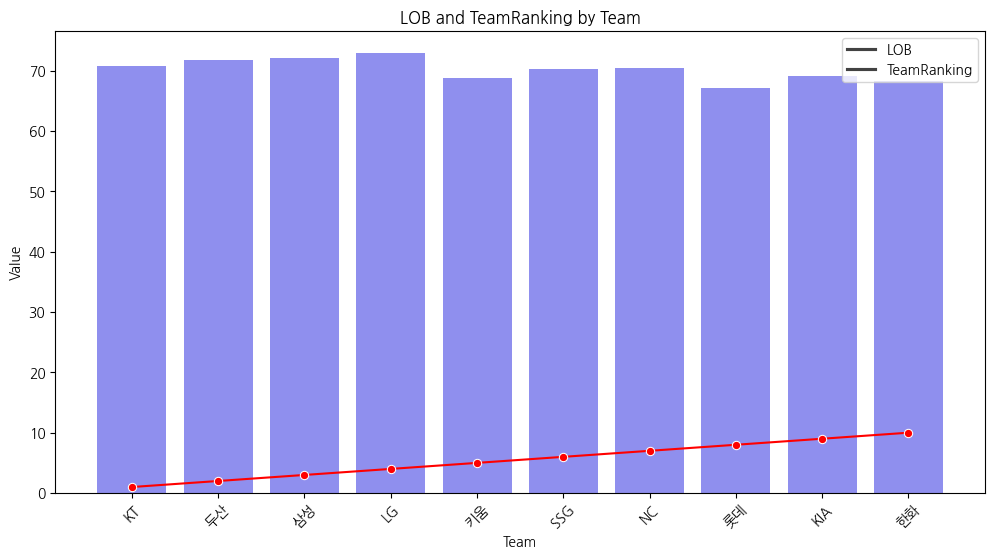

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='LOB', data=team_2021_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

sns.lineplot(x='Team', y='TeamRanking', data=team_2021_pitching, color='r', marker='o')  # marker는 데이터 포인트를 표시하는 모양을 지정합니다.

plt.title('LOB and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['LOB', 'TeamRanking'])

plt.show()

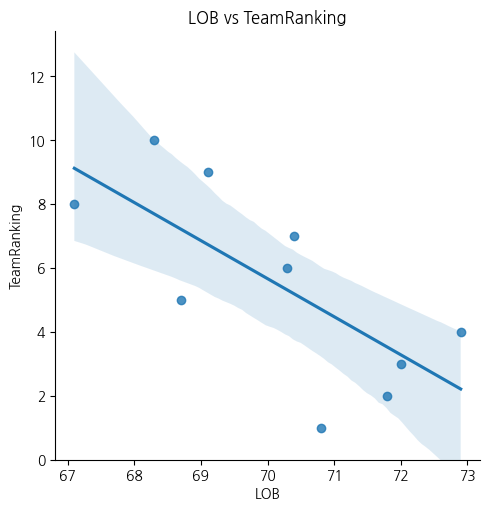

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='LOB', y='TeamRanking', data=team_2021_pitching)
plt.title('LOB vs TeamRanking')
plt.xlabel('LOB')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

# AVG

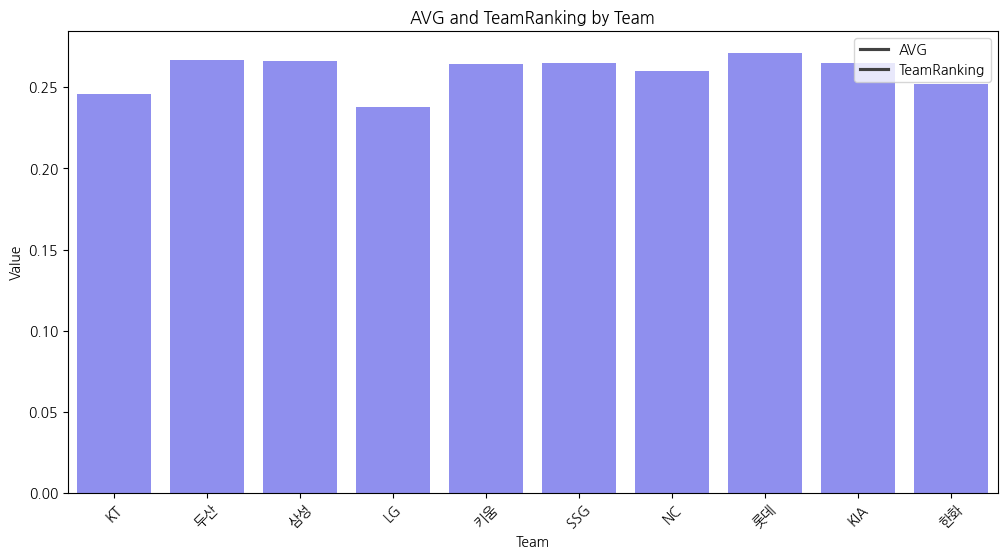

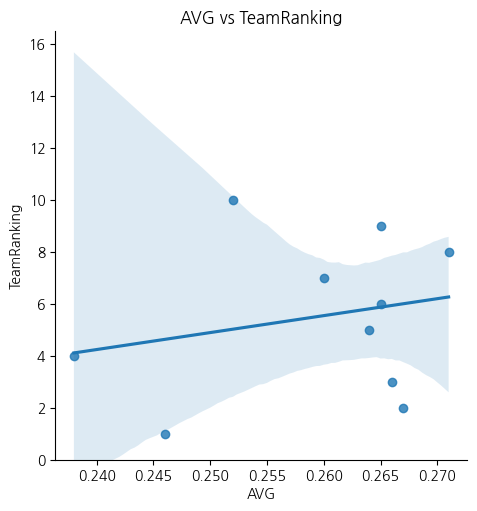

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='AVG', data=team_2021_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

plt.title('AVG and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['AVG', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='AVG', y='TeamRanking', data=team_2021_pitching)
plt.title('AVG vs TeamRanking')
plt.xlabel('AVG')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

# OBP

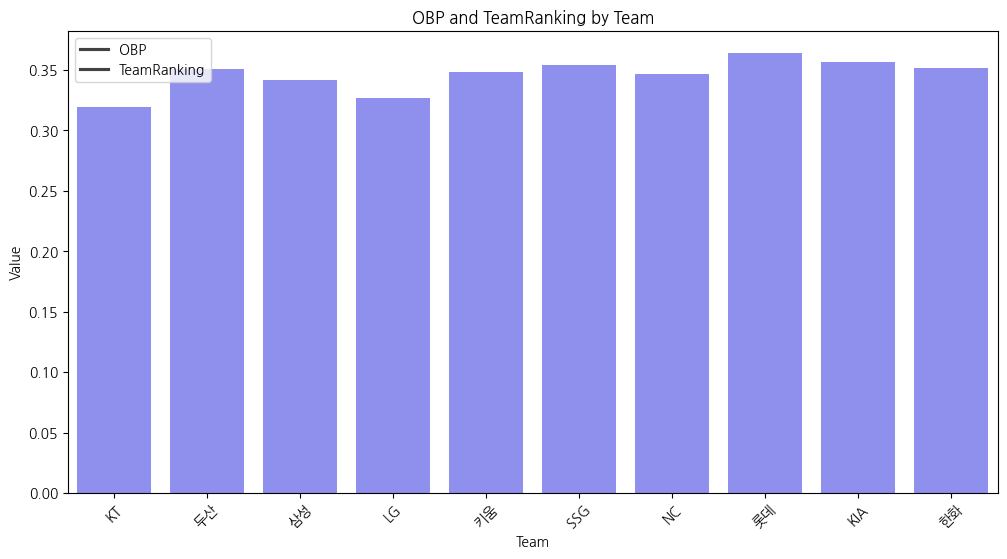

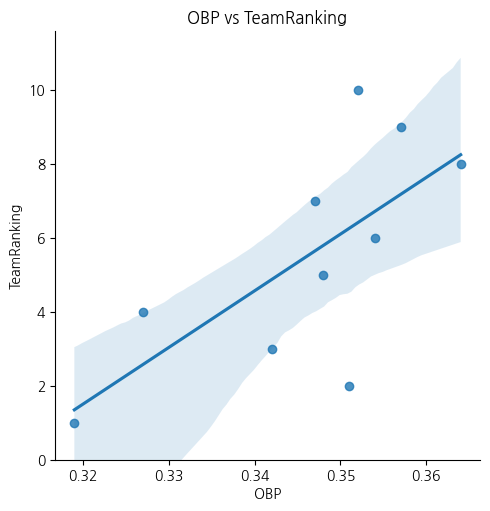

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='OBP', data=team_2021_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

plt.title('OBP and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['OBP', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='OBP', y='TeamRanking', data=team_2021_pitching)
plt.title('OBP vs TeamRanking')
plt.xlabel('OBP')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

# SLG

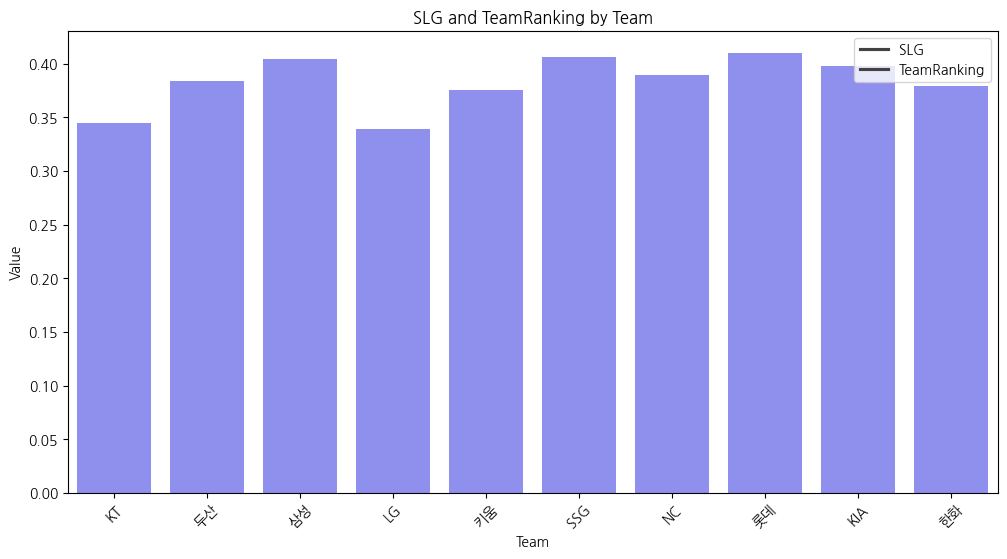

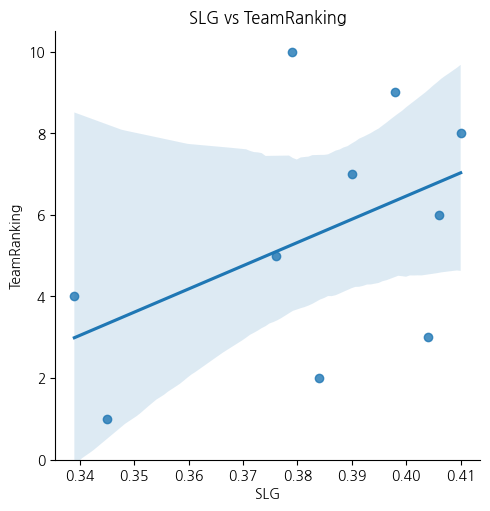

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='SLG', data=team_2021_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

plt.title('SLG and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['SLG', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='SLG', y='TeamRanking', data=team_2021_pitching)
plt.title('SLG vs TeamRanking')
plt.xlabel('SLG')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

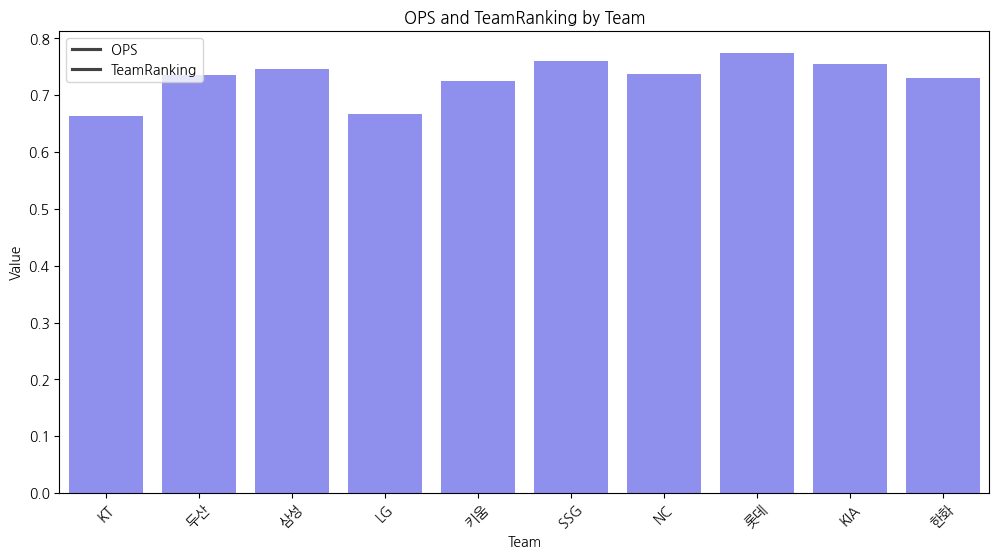

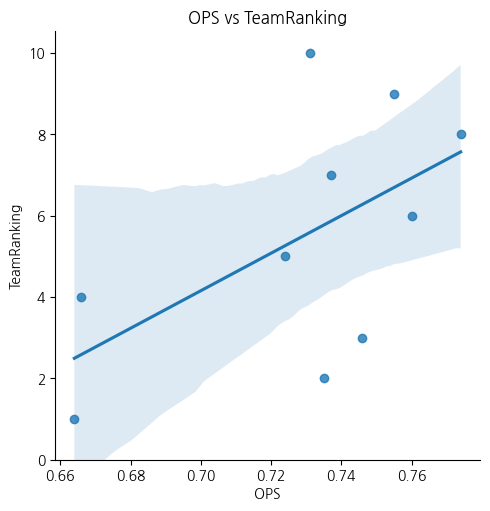

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='OPS', data=team_2021_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

plt.title('OPS and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['OPS', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='OPS', y='TeamRanking', data=team_2021_pitching)
plt.title('OPS vs TeamRanking')
plt.xlabel('OPS')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

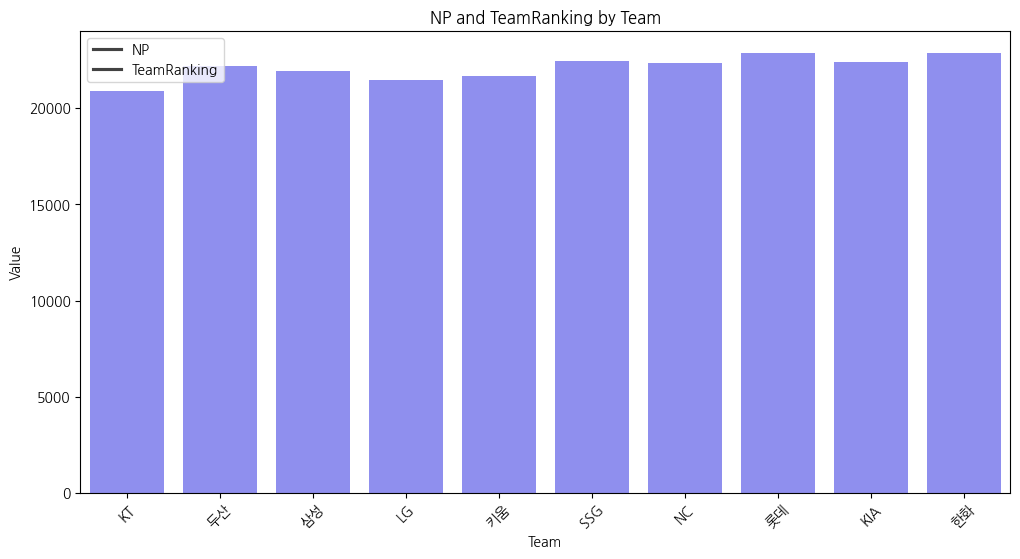

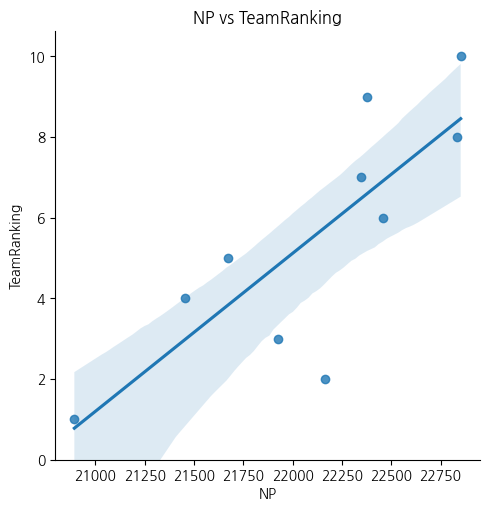

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='NP', data=team_2021_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

plt.title('NP and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['NP', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='NP', y='TeamRanking', data=team_2021_pitching)
plt.title('NP vs TeamRanking')
plt.xlabel('NP')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

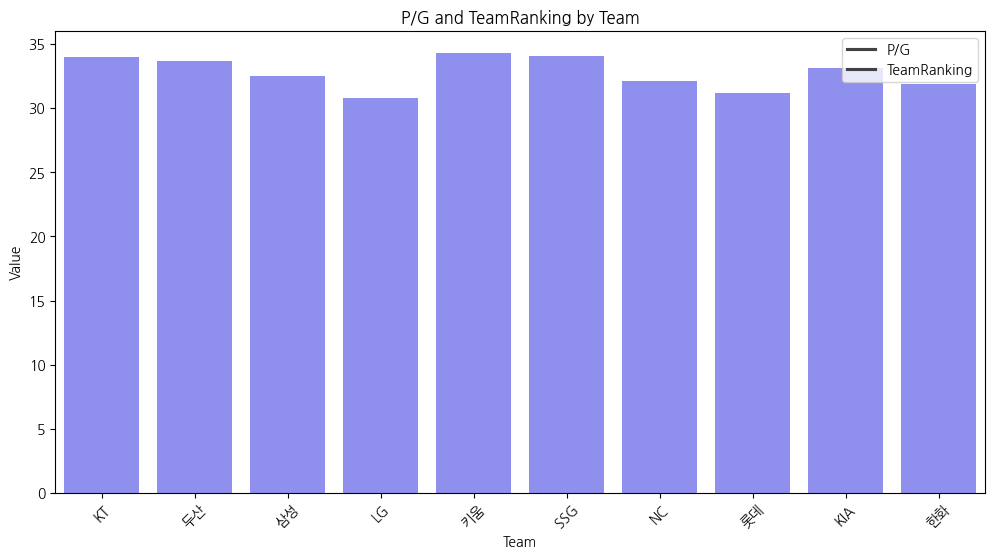

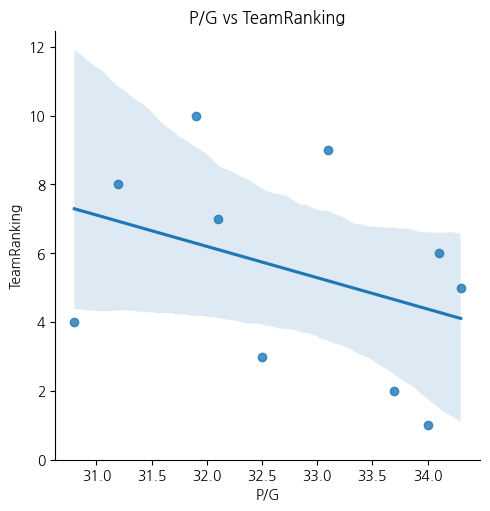

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='P/G', data=team_2021_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

plt.title('P/G and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['P/G', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='P/G', y='TeamRanking', data=team_2021_pitching)
plt.title('P/G vs TeamRanking')
plt.xlabel('P/G')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

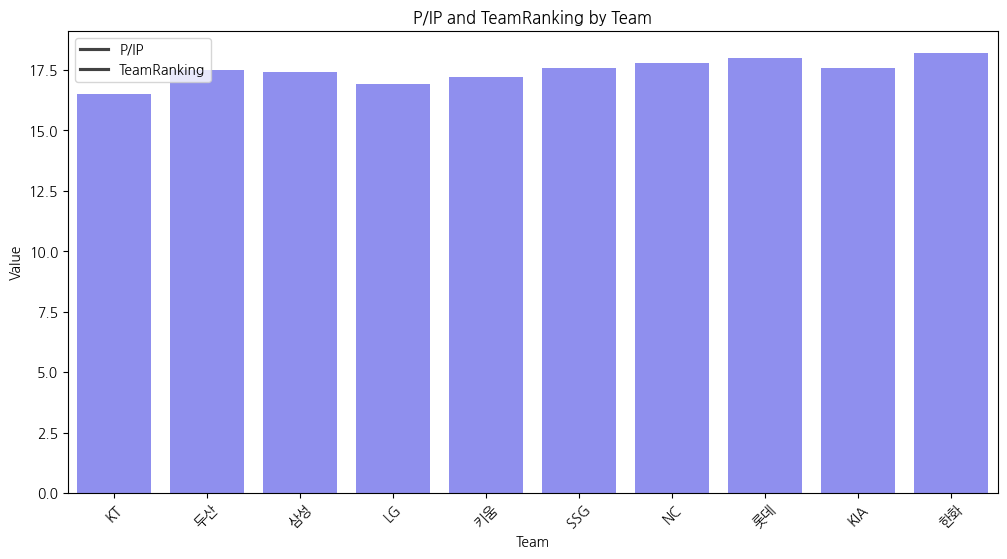

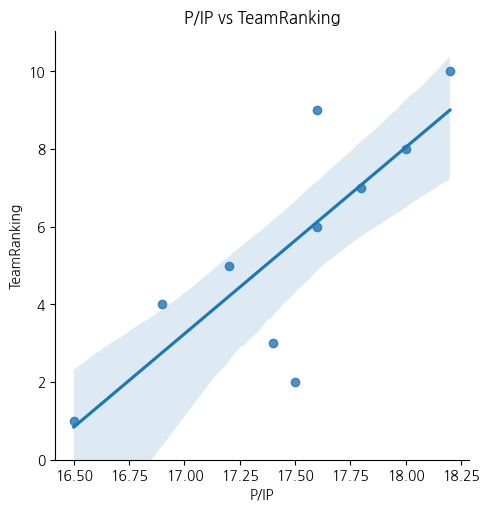

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='P/IP', data=team_2021_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

plt.title('P/IP and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['P/IP', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='P/IP', y='TeamRanking', data=team_2021_pitching)
plt.title('P/IP vs TeamRanking')
plt.xlabel('P/IP')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()

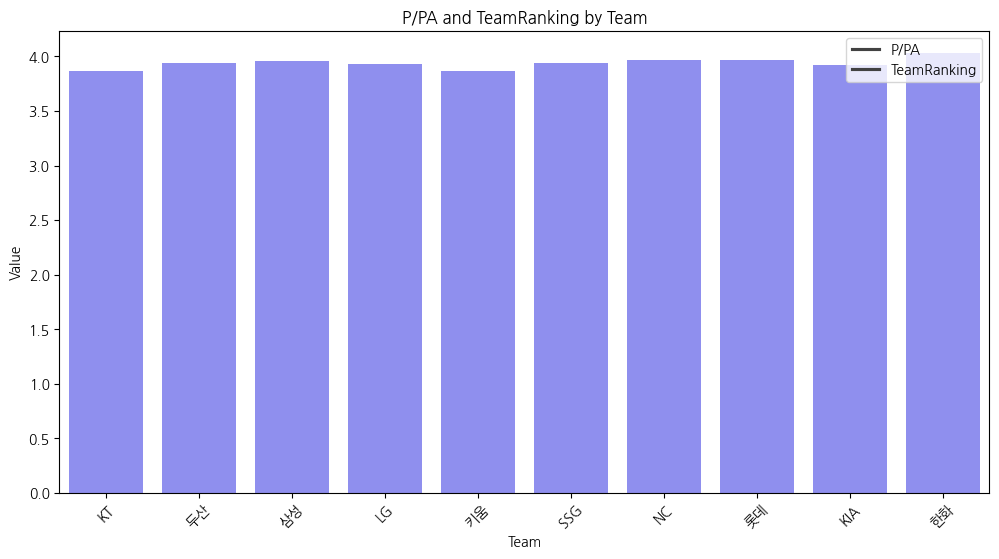

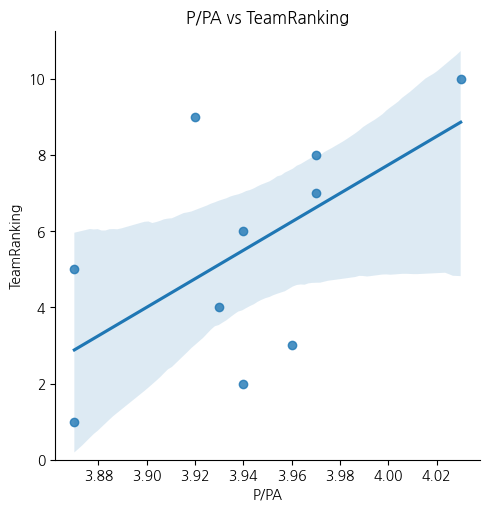

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Team', y='P/PA', data=team_2021_pitching, color='b', alpha=0.5)  # alpha는 투명도를 조절합니다.

plt.title('P/PA and TeamRanking by Team')
plt.xlabel('Team')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.legend(labels=['P/PA', 'TeamRanking'])

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='P/PA', y='TeamRanking', data=team_2021_pitching)
plt.title('P/PA vs TeamRanking')
plt.xlabel('P/PA')
plt.ylabel('TeamRanking')
plt.ylim(0)  
plt.show()